<a href="https://colab.research.google.com/github/kasubikila/githubTest/blob/main/%3Cyour_x500%3EHomework9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1 QR Factorization**

**1.1** Orthogonality

In [7]:
import numpy as np

R = np.array([[1, 0, -2], [0, 1, 2.5], [0, 0, 0]])

# B1 is the row space of R, which consists of the first two rows of R
B1 = R[:2, :]

# B2 is the null space of R. We use a known solution to the null space of R.
# Solving for null space manually or by using np.linalg
B2 = np.array([[2.5], [-2.], [1]])  # Correct shape for the null space vector

# Function to check orthogonality between B1 and B2
def orth_check(B1, B2):
    # Check orthogonality using the dot product and norm of B1 and B2
    orthogonality_check = np.linalg.norm(B1 @ B2, ord='fro') / (np.linalg.norm(B1, ord='fro') * np.linalg.norm(B2, ord='fro'))
    return orthogonality_check

# Print the results
print("B1 (Row Space):\n", B1)
print("B2 (Null Space):\n", B2)

print('Numerically check the B_1 is orthogonal to B_2')
print(orth_check(B1, B2))  # Corrected function call


B1 (Row Space):
 [[ 1.   0.  -2. ]
 [ 0.   1.   2.5]]
B2 (Null Space):
 [[ 2.5]
 [-2. ]
 [ 1. ]]
Numerically check the B_1 is orthogonal to B_2
0.060233860193683424


**1.2** Projection

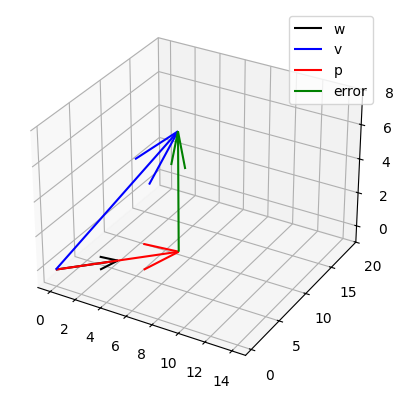

Check projection error orthogonal to w:
[[0.]]


In [8]:
import numpy as np
import matplotlib.pyplot as plt

v = np.array([[6], [8], [7]], dtype=np.float64)
w = np.array([[3], [4], [0]], dtype=np.float64)

######################################################################
# Function to compute the projection of v onto w
def proj_vector(w, v):
    # Compute projection of v onto w
    proj_coeff = np.dot(v.T, w) / np.dot(w.T, w)
    p = proj_coeff * w
    return p

# Get the projection of v onto w
p_1 = proj_vector(w, v)

######################################################################
# Function to plot 3D vectors
def plot_3D_vec(w, v, p):
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    ax.set_xlim(-1, 15)
    ax.set_ylim(-1, 20)
    ax.set_zlim(-1, 8)

    O = [0, 0, 0]  # Origin for vectors
    ax.quiver(O[0], O[1], O[2], w[0], w[1], w[2], label='w', color='black')
    ax.quiver(O[0], O[1], O[2], v[0], v[1], v[2], label='v', color='blue')
    ax.quiver(O[0], O[1], O[2], p[0], p[1], p[2], label='p', color='red')
    ax.quiver(p[0], p[1], p[2], v[0] - p[0], v[1] - p[1], v[2] - p[2], label='error', color='green')

    plt.legend()
    plt.show()

# Plot the vectors
plot_3D_vec(w, v, p_1)

######################################################################
# Function to check the projection error
def check_proj_vec(w, v, p):
    # Check if the error vector (v - p) is orthogonal to w by checking the dot product
    error_vec = v - p
    res = np.dot(w.T, error_vec)  # Should be close to 0
    return res

# Check projection error orthogonal to w
print("Check projection error orthogonal to w:")
print(check_proj_vec(w, v, p_1))  # Should print a value close to 0


In [12]:
import numpy as np

A = np.array([[1, 0], [2, 1], [0, 1]], dtype=np.float64)
v = np.array([[6], [8], [7]], dtype=np.float64)

###################################################################
# Function to compute the projection of v onto the column space of A
def proj_matrix(A, v):
    # Compute the projection matrix P_A
    A_T_A_inv = np.linalg.inv(A.T @ A)  # Inverse of A^T A
    P_A = A @ A_T_A_inv @ A.T  # Projection matrix
    p = P_A @ v  # Project v onto the column space of A
    return p

# Get the projection of v onto the column space of A
p_2 = proj_matrix(A, v)

###################################################################
# Function to check the projection error
def check_proj_matrix(A, v, p):
    # Check if the error vector (v - p) is orthogonal to the column space of A
    error_vec = v - p
    # Check if A^T(v - p) is close to zero
    res = np.allclose(A.T @ error_vec, np.zeros_like(A.T @ error_vec))
    return res

# Check projection error orthogonal to the column space of A
print("Check projection error orthogonal to the column space of A:")
print(check_proj_matrix(A, v, p_2))  # Should return True if the projection is correct


Check projection error orthogonal to the column space of A:
True


**1.3** QR factorization for matrix with independent columns

In [15]:
import numpy as np

A = np.array([[1, 2, 0], [0, 1, 1], [1, 0, 1]], dtype=np.float64)

def QR(A):
    # Step 1: Initialize matrices Q and R
    m, n = A.shape
    Q = np.zeros((m, n), dtype=np.float64)
    R = np.zeros((n, n), dtype=np.float64)

    # Step 2: Gram-Schmidt Process
    for j in range(n):
        # Start with the j-th column of A
        v = A[:, j]

        # Subtract the projections onto the previous columns of Q
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])  # Calculate the R[i, j] element
            v = v - R[i, j] * Q[:, i]  # Subtract the projection

        # Normalize the vector v to get the j-th column of Q
        R[j, j] = np.linalg.norm(v)  # Calculate the R[j, j] element
        Q[:, j] = v / R[j, j]  # Normalize the vector to get the orthonormal vector

    return Q, R

# Perform QR factorization
Q, R = QR(A)

# Display the results
print("QR Factorization:")
print("Q:\n", Q)
print("R:\n", R)


QR Factorization:
Q:
 [[ 0.70710678  0.57735027 -0.40824829]
 [ 0.          0.57735027  0.81649658]
 [ 0.70710678 -0.57735027  0.40824829]]
R:
 [[1.41421356e+00 1.41421356e+00 7.07106781e-01]
 [0.00000000e+00 1.73205081e+00 2.22044605e-16]
 [0.00000000e+00 0.00000000e+00 1.22474487e+00]]


In [14]:
B = np.array([[0.488894, 0.888396, 0.325191, 0.319207],
              [1.03469, -1.14707, -0.754928, 0.312859],
              [0.726885, -1.06887, 1.3703, -0.86488],
              [-0.303441, -0.809499, -1.71152, -0.0300513],
              [0.293871, -2.94428, -0.102242, -0.164879],
              [-0.787283, 1.43838, -0.241447, 0.627707]], dtype=np.float64)

Q_1, R_1 =QR(B)


print("QR Factorization:")
print(Q_1) # Print out Q_1, R_1 matrix out and you can check Q_1.T@Q_1 = I
print(R_1) # R_1 should be a up-triangular matrix



QR Factorization:
[[ 0.30110946  0.46074898 -0.09409473  0.24498921]
 [ 0.63726483  0.0433632  -0.55860084  0.25120018]
 [ 0.44768795 -0.05049669  0.51979706 -0.41105066]
 [-0.18688909 -0.36541282 -0.61795518 -0.48979285]
 [ 0.18099494 -0.79362948  0.16394286  0.49211145]
 [-0.48488703  0.14108795 -0.01328287  0.47523194]]
[[ 1.6236421  -2.02106819  0.64872948 -0.42029906]
 [ 0.          3.24896812  0.72038807  0.4347103 ]
 [ 0.          0.          2.14747048 -0.6711592 ]
 [ 0.          0.          0.          0.74418848]]
